In [1]:
# 1. Implement Naïve Bayes method using scikit-learn library. 
#  a. Use the glass dataset available in Link also provided in your assignment.
#  b. Use train_test_split to create training and testing part. 
# 2. Evaluate the model on testing part using score and Classification Report 

In [2]:
import pandas as pd

##Getting the data
glass = pd.read_csv('glass.csv')
print('Columns: ',glass.columns.values)
print("\ndataframe.info, information about features")
glass.info()
print("\ndataframe.head, by default displays first 5 rows")
glass.head()

Columns:  ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']

dataframe.info, information about features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

dataframe.head, by default displays first 5 rows


RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [3]:
print("dataframe.describe(), displays summary of statistics")
glass.describe()

dataframe.describe(), displays summary of statistics


RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [4]:
print(glass.isnull().sum())
print('-'*10)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
----------


In [5]:
glass.corr().style.background_gradient(cmap="Blues")

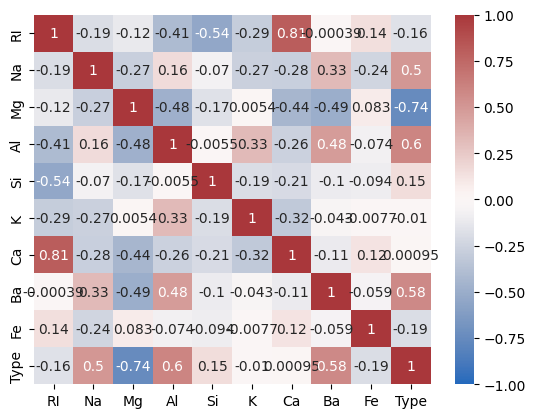

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(glass.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(glass[::-1], glass.iloc[:, -1].values,test_size=0.2, random_state=1)

In [12]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_gaussian = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_gaussian )

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [13]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)

y_pred = multinomial.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_multinomial = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_multinomial )

              precision    recall  f1-score   support

           1       0.94      0.79      0.86        19
           2       0.41      0.92      0.56        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.60        43
   macro avg       0.89      0.28      0.24        43
weighted avg       0.81      0.60      0.54        43

[[15  4  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.6046511627906976


In [14]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
Bernoulli = BernoulliNB()
Bernoulli.fit(X_train, y_train)

y_pred = Bernoulli.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_bernoulli = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_bernoulli)

              precision    recall  f1-score   support

           1       0.88      0.74      0.80        19
           2       0.41      0.92      0.56        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.58        43
   macro avg       0.88      0.28      0.23        43
weighted avg       0.78      0.58      0.51        43

[[14  5  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.5813953488372093


In [15]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
Complement = ComplementNB()
Complement.fit(X_train, y_train)

y_pred = Complement.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_complement = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_complement)

              precision    recall  f1-score   support

           1       0.77      0.89      0.83        19
           2       0.38      0.67      0.48        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.58        43
   macro avg       0.86      0.26      0.22        43
weighted avg       0.73      0.58      0.50        43

[[17  2  0  0  0  0]
 [ 4  8  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.5813953488372093


In [20]:
# 1. Implement SVM method using scikit-learn library. 
# a. Use the glass dataset available in Link also provided in your assignment.
# b. Use train_test_split to create training and testing part. 
# 2. Evaluate the model on testing part using score and Classification Report 

In [17]:
# Support Vector Machine's 
##LinearSVC implemented in terms of liblinear while SVC is implemented in libsvm

from sklearn.svm import SVC

svmClassifier = SVC()
svmClassifier.fit(X_train, y_train)

y_pred = svmClassifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_svc = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_svc )

              precision    recall  f1-score   support

           1       1.00      0.00      0.00        19
           2       0.28      1.00      0.44        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.28        43
   macro avg       0.88      0.17      0.07        43
weighted avg       0.80      0.28      0.12        43

[[ 0 19  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.27906976744186046


In [18]:
models = pd.DataFrame({
    'Model': ['GaussianNB','MultinomialNB','BernoulliNB','ComplementNB','SVC'],
    'Score': [glass_acc_gaussian,glass_acc_multinomial,glass_acc_bernoulli,glass_acc_complement,glass_acc_svc]})
models.sort_values(by='Score', ascending=False)

Model     Score
0     GaussianNB  0.837209
1  MultinomialNB  0.604651
2    BernoulliNB  0.581395
3   ComplementNB  0.581395
4            SVC  0.279070

In [19]:
"""Based on Scores, Gaussian Naive baise is predicts more accurate compared to other algorithms 
NB assumes that features are independent between them, but this assumption does not always hold. 
Even though, NB gives good results when applied to short texts like tweets. 
For some datasets, NB may defeat other classifiers using feature selection. 
SVM is more powerful to address non-linear classification tasks"""

'Based on Scores, Gaussian Naive baise is predicts more accurate compared to other algorithms \nNB assumes that features are independent between them, but this assumption does not always hold. \nEven though, NB gives good results when applied to short texts like tweets. \nFor some datasets, NB may defeat other classifiers using feature selection. \nSVM is more powerful to address non-linear classification tasks'